# T5 Modelos basados en ejemplos

**Índice**

> 1 Introducción<br>
>> 1.1 Modelos paramétricos<br>
>> 1.2 Modelos no paramétricos<br>
>
> 2 K-vecinos más próximos<br>
>> 2.1 Definición<br>
>> 2.2 Resultados asintóticos<br>
>> 2.3 Ejemplo<br>
>> 2.4 Diagrama de Voronoi<br>
>> 2.5 $K$ como hiperparámetro de regularización<br>
>> 2.6 The curse of dimensionality<br>
>>> 2.6.1 Concentración de distancias<br>
>>> 2.6.2 Pérdida de localidad<br>
>>
>> 2.7 Reducción del coste computacional<br>
>> 2.8 Reconocimiento (de conjunto) abierto<br>
>
> 3 Estimación con kernels densidad<br>
>> 3.1 Kernels densidad<br>
>> 3.2 Estimador de densidad ventana de Parzen<br>
>> 3.3 Elección del parámetro ancho de banda<br>
>> 3.4 De clasificación KDE a KNN<br>
>> 3.5 Regresión kernel<br>
>>> 3.5.1 Nadaraya-Watson<br>
>>> 3.5.2 Nadaraya-Watson Gaussiano con softmax<br>

<p style="page-break-after:always;"></p>

# 1 Introducción

## 1.1 Modelos paramétricos

**Parámetros:** $\;$ un conjunto finito $\,\boldsymbol{\theta}\,$ (convenientemente formateado)

**Modelos incondicionales y condicionales:** $\;$ $p(\boldsymbol{y}\mid\boldsymbol{\theta})\,$ y $\,p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})$

**Datos:** $\;$ $\mathcal{D}=\{(\boldsymbol{x}_n, \boldsymbol{y}_n)\}_{n=1}^N\,$ **no se mantiene en inferencia**

## 1.2 Modelos no paramétricos

**Parámetros:** $\;$ ninguno o pocos; en realidad son los datos, que **sí se mantienen en inferencia**

**Medida de (di)similitud o distancia:** $\;$ para comparar muestras en entrenamiento e inferencia

**Otros nombres:** $\;$ **modelos basados en ejemplos**, **instance-based learning** y **memory-based learning**

<p style="page-break-after:always;"></p>

# 2 K-vecinos más próximos

## 2.1 Definición

**Clasificador (por los) $K$ vecinos más próximos o K nearest neighbor (KNN):** $\;$ dada una entrada $\boldsymbol{x}$, busca $K$ prototipos (datos) más cercanos a $\boldsymbol{x}$, $N_K(\boldsymbol{x},\mathcal{D})$, y deriva una distribución sobre las salidas en $\boldsymbol{x}$
$$p(y=c\mid\boldsymbol{x},\mathcal{D})%
=\frac{1}{K}\sum\nolimits_{n\in N_K(\boldsymbol{x},\mathcal{D})}\mathbb{I}(y_n=c)$$

**Clasificador KNN en breve:** $\;$ retorna la etiqueta más votada (mayoritaria) si es única; si no, en caso de empate a votos entre dos o más clases, devuelve la del prototipo más cercano entre los prototipos de las clases empatadas

**Clasificador por el vecino más próximo o nearest neighbor (NN):** $\;$ KNN con $K=1$ resulta una delta
$$p(y=c\mid\boldsymbol{x},\mathcal{D})=\delta(c,y_n)%
\quad\text{con conjunto unitario}\quad%
N_1(\boldsymbol{x},\mathcal{D})=\{n\}$$

**Desempates a distancia decididos al azar:** $\;$ asumimos que la probabilidad de empate a distancia entre dos prototipos es insignificante; luego, en caso de dos o más posibles conjuntos de $K$ prototipos más cercanos a $\boldsymbol{x}$, escogemos uno de ellos al azar

**Desempates a votos decididos por el NN:** $\;$ la probabilidad de empate a votos es significativa (p.e. $K=2$), por lo que no desempatamos al azar, sino que aplicamos NN entre los prototipos de las clases empatadas

**Parámetros principales de KNN:** $\;$ tamaño del entorno local, $K$, y la distancia $d(\boldsymbol{x},\boldsymbol{x}')$ con la que compara cualquier par de puntos en el espacio de representación de los datos, típicamente $\mathbb{R}^D$

**Elección de la función distancia:** $\;$ se suele usar la Euclídea o, más generalmente, se introduce alguna función con parámetros a aprender; por ejemplo, la distancia de 
Mahalanobis
$$d_M(\boldsymbol{x},\boldsymbol{\mu})=\sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^tM(\boldsymbol{x}-\boldsymbol{\mu})}%
\quad\text{con}\quad M\succ 0$$

<p style="page-break-after:always;"></p>

## 2.2 Resultados asintóticos

**Análisis asintótico:** $\;$ KNN ha sido objeto de amplio estudio cuando $N\to\infty$

**NN asintótico:** $\;$ su error de clasificación no es superior a dos veces el de Bayes

**KNN asintótico:** $\;$ su error converge al de Bayes si $K$ se escoge tal que 
$$K\to\infty \qquad\text{y}\qquad K/N\to 0$$
* Ejemplo: $\quad K=\sqrt{N}$

<p style="page-break-after:always;"></p>

## 2.3 Ejemplo

En un problema de clasificación en dos clases, $y\in\{0,1\}$, 5NN para un punto de test $\boldsymbol{x}$ halla $3$ vecinos de la clase $1$ y $2$ de la clase $0$, por lo que la probabilidad de que $\boldsymbol{x}$ pertenezca a la clase $1$ se estima como $\,p(y=1\mid\boldsymbol{x},\mathcal{D})=\frac{3}{5}=0.6$.

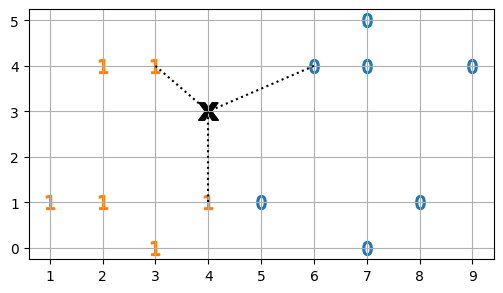

In [1]:
import numpy as np; from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
X0 = np.array(([5, 1], [6, 4], [7, 0], [7, 4], [7, 5], [8, 1], [9, 4]), dtype=float)
X1 = np.array(([1, 1], [2, 1], [2, 4], [3, 0], [3, 4], [4, 1]), dtype=float)
N0 = X0.shape[0]; N1 = X1.shape[0]; X = np.vstack((X0, X1))
y = np.vstack((np.zeros((N0, 1)), np.ones((N1, 1)))); x = np.array(([4, 3])) # <<< test
fig, ax = plt.subplots(figsize=(6, 3.25)); ax.grid(); ax.scatter(*x, c='k', marker=r'$\mathbf{x}$', s=200)
ax.scatter(*X0.T, marker=r'$0$', s=100); ax.scatter(*X1.T, marker=r'$1$', s=100)
K = 3; KNN = NearestNeighbors(n_neighbors=K).fit(X); _, KNN_ind = KNN.kneighbors([x])
lines = np.zeros((K, 2, 2)); lines[:, 0, :] = np.squeeze(X[KNN_ind, :])
lines[:, 1, :] = np.repeat([x], K, axis=0); 
ax.add_collection(LineCollection(lines, colors='black', linestyle='dotted'));

<p style="page-break-after:always;"></p>

## 2.4 Diagrama de Voronoi

**Partición del espacio inducida por NN:** $\;$  consta de una región $V(\boldsymbol{x}_n)$ por cada dato $\boldsymbol{x}_n$ tal que todos los puntos en $V(\boldsymbol{x}_n)$ están más cerca de $\boldsymbol{x}_n$ que de cualquier otro dato

**Diagrama y celda de Voronoi:** $\;$ partición en el plano; cada región se denomina **celda de Voronoi**

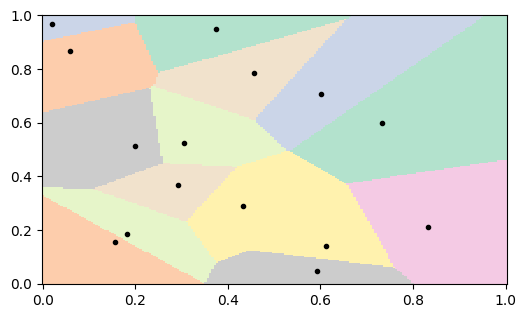

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.spatial import KDTree, Voronoi
np.random.seed(42); data = np.random.rand(15, 2)
fig, ax = plt.subplots(figsize=(6, 3.5)); #voronoi_plot_2d(vor, ax=ax, show_vertices=False)
xlim = plt.xlim(); ylim = plt.ylim(); tree = KDTree(data); M = 200
x = np.linspace(xlim[0], xlim[1], M); y = np.linspace(ylim[0], ylim[1], M)
xx, yy = np.meshgrid(x, y); xy = np.c_[xx.ravel(), yy.ravel()]; plt.plot(*data.T, 'ko', markersize=3)
plt.pcolormesh(x, y, tree.query(xy)[1].reshape(M, M), cmap='Pastel2');

<p style="page-break-after:always;"></p>

## 2.5 $K$ como hiperparámetro de regularización

**Buenos resultados con $K$ reducido:** $\;$ en general, los resultados teóricos y prácticos apoyan la idea de que un $K$ reducido obtendrá resultados comparativamente buenos

**Interpretación de $K$ como hiperparámetro de regularización:** $\;$ si $K$ es muy pequeño, el modelo tenderá a sobre-ajustarse a los datos mientras que, si $K$ es muy grande, se aproximará a las probabilidades a priori de las clases; por tanto, $K$ puede interpretarse como un hiperparámetro de regularización con el que optimizar el grado de ajuste a los datos

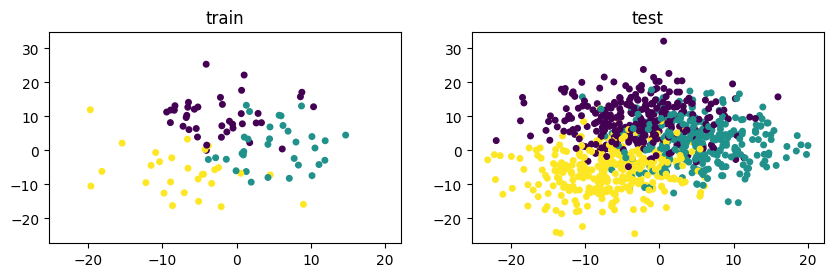

In [3]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score; from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100; x_train = X[:ntrain]; y_train = y[:ntrain];  x_test = X[ntrain:]; y_test = y[ntrain:]
fig, axes = plt.subplots(1, 2, figsize=(10, 2.75))
ax=axes[1]; ax.set_title('test'); ax.scatter(*x_test.T, c=y_test, s=16)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
ax=axes[0]; ax.set_title('train'); ax.scatter(*x_train.T, c=y_train, s=16)
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);


<p style="page-break-after:always;"></p>


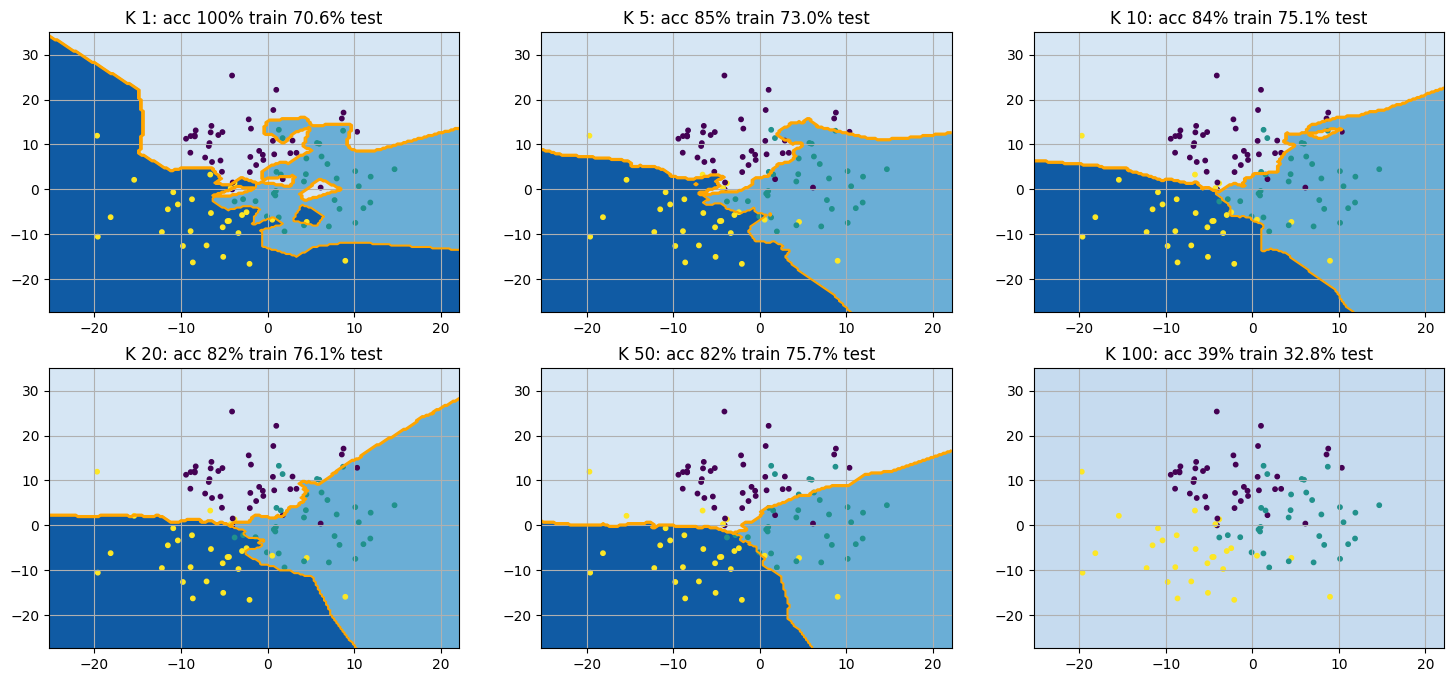

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
Ks = [1, 5, 10, 20, 50, ntrain]; nrows = 2; ncols = 3; n_Ks = len(Ks)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8))
for i, K in enumerate(Ks):
    ax = axes.flat[i]
    clf = KNN(n_neighbors=K).fit(x_train, y_train)
    acc_train = accuracy_score(y_train, clf.predict(x_train))
    acc_test = accuracy_score(y_test, clf.predict(x_test))
    ax.grid(); ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=200), np.linspace(y_min, y_max, num=200))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')
    ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues'); ax.scatter(*x_train.T, c=y_train, s=10)
    ax.set_title('K {}: acc {:.0%} train {:.1%} test'.format(K, acc_train, acc_test))

<p style="page-break-after:always;"></p>

# 2.6 The curse of dimensionality

**Maldición de la dimensionalidad:** $\;$ expresión bien conocida para referirse al hecho de que, por lo general, muchas técnicas clásicas como el clasificador KNN empeoran sensiblemente con entradas de alta dimensión

**Maldición de la dimensionalidad y KNN:** $\;$ en el caso del clasificador KNN, la maldición de la dimensionalidad se explica fácilmente ya que, al aumentar la dimensión, las distancias se igualan y el NN se halla en un entorno cada vez menos local

### 2.6.1 Concentración de distancias

**Concentración de distancias:** $\;$ fenómeno por el cual las distancias se igualan en altas dimensiones

**Distancia mediana al NN en función de $D$:** $\;$ si tenemos $N$ datos uniformemente distribuidos en una bola unitaria $D$-dimensional centrada en el origen (donde asumimos que se halla la muestra de test), se puede comprobar que la distancia mediana del origen a su vecino más cercano es (ver [solución al ejercicio 2.3 de HTF09](https://waxworksmath.com/Authors/G_M/Hastie/WriteUp/Weatherwax_Epstein_Hastie_Solution_Manual.pdf))
$$d(D,N)=\left(1-\left(\frac{1}{2}\right)^{1/N}\right)^{1/D}$$
* Para $N=500$ y $D=10$, $d(D,N)\approx 0.52$, esto es, más de la mitad de la distancia a la frontera
* En general, el vecino más cercano se aproxima a la frontera de la bola en altas dimensiones, donde también se hallarán el resto de datos a distancia (prácticamente) unitaria


<p style="page-break-after:always;"></p>


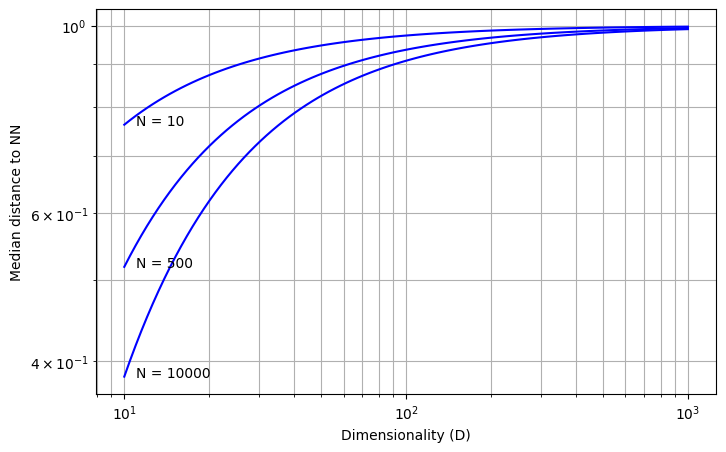

In [5]:
import numpy as np
import matplotlib.pyplot as plt
D = np.logspace(1, 3, 100); plt.figure(figsize=(8, 5))
plt.xscale('log', base=10); plt.yscale('log', base=10); plt.grid(which='both')
for N in [10, 500, 10000]:
  d = ( 1 - .5 ** (1 / N) ) ** (1 / D)
  plt.plot(D, d, 'b-')
  plt.text(11, ( 1 - .5 ** (1 / N) ) ** (1 / 10), 'N = %d' % N)
  plt.xlabel('Dimensionality (D)')
  plt.ylabel('Median distance to NN')

<p style="page-break-after:always;"></p>

### 2.6.2 Pérdida de localidad

**Pérdida de localidad:** $\;$ en general, con el aumento de la dimensión, tenemos entornos cada vez menos locales
* Supongamos que los datos se distribuyen uniformemente en un hipercubo unitario $D$-dimensional
* Consideremos un entorno hipercúbico centrado en la muestra de test que capture una fracción $r$ de los datos
* Longitud esperada del lado del entorno que captura una fracción $r$ del volumen unitario: $\;e_D(r)=r^{1/D}$
* Como $\,e_{10}(0.01)=0.63,\,$ debemos cubrir el $63\%$ de cada variable para capturar el $1\%$ de los datos

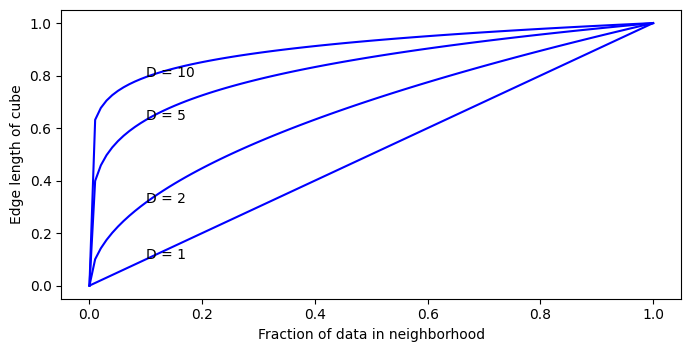

In [6]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0, 1, 100); plt.figure(figsize=(8, 3.75))
for D in [1, 2, 5, 10]:
  e = r ** (1 / D); plt.plot(r, e, 'b-'); plt.text(0.1, 0.1 ** (1 / D), 'D = %d' % D)
  plt.xlabel('Fraction of data in neighborhood'); plt.ylabel('Edge length of cube')

<p style="page-break-after:always;"></p>

## 2.7 Reducción del coste computacional

**Elevado coste computacional de KNN:** $\;$ espacial y temporal, debido al mantenimiento de (todos) los datos en inferencia

**Técnicas de reducción del coste espacial:** $\;$ eliminan prototipos que no afectan a las fronteras de decisión

**Técnicas de reducción del coste temporal:** $\;$ búsqueda eficiente de K vecinos, exacta y aproximada (para $D>10$)
* **K-d tree:** divide el espacio en regiones de lados paralelos a los ejes, o con algún método de clustering basado en puntos ancla
* **Locality sensitive hashing (LSH):** técnica popular de 1999; más recientemente se aprende la función de hashing

**Librería popular para la búsqueda eficiente de vecinos:** $\;$ [FAISS](https://github.com/facebookresearch/faiss)

<p style="page-break-after:always;"></p>

## 2.8 Reconocimiento (de conjunto) abierto

**Closed world assumption:** $\;$ asunción tı́pica según la cual el conjunto de clases en un problema de clasificación se halla prefijado

**Open set recognition:** $\;$ posibilidad de de ampliar el conjunto de clases con muestras de test provinientes de nuevas categorías

**KNN y open set recognition:** $\;$ en contraste con otras técnicas, los clasificadores KNN pueden adaptarse con relativa facilidad

**Tareas típicas de open set recognition:**
* **Novelty detection:** el sistema detecta que la muestra de test es de una clase no vista antes; por ejemplo una cara desconocida
* **Incremental learning, online learning, life-long learning o continual learning:** si el sistema detecta una nueva clase con éxito, pregunta por el id de la nueva clase y la añade a las existentes
* **Out-of-distribution (OOD) detection:** se detecta que la muestra de test no es de clase conocida ni desconocida, sino que procede de una distribución enteramente distinta; p.e., una foto sin cara
* **Few-shot classification:** tenemos pocos ejemplos (tal vez uno solo) de cada clase; caso muy adecuado para KNN y tı́pico en online
* **Person re-identification o face verification:** se comprueba si la persona o cara de test es, con seguridad, de clase conocida
* **Entity resolution o linking:** se trata de determinar si cadenas diferentes (p.e. "John Smith" y "Jon Smith") se refieren a la misma entidad o no
* **Multi-object tracking:** cuando un sistema de radar detecta un nuevo "blip", debe decidir si se trata de un objeto ya en seguimiento o un nuevo objeto que ha entrado en el espacio aéreo

<p style="page-break-after:always;"></p>

# 3 Estimación con kernels densidad

## 3.1 Kernels densidad

**Kernel density estimation (KDE):** $\;$ aproximación no paramétrica a la estimación de densidades que define un modelo generativo $p(\boldsymbol{x})$ 

**Kernel densidad:** $\;$ función no negativa $\mathcal{K}:\mathbb{R}\to\mathbb{R}^{\geq 0}$, normalizada y simétrica:
$$\int\mathcal{K}(x)\,dx=1%
\qquad\text{y}\qquad%
\mathcal{K}(-x)=\mathcal{K}(x)$$
La simetría implica $\int x\mathcal{K}(x)\,dx=0$ y, en general:
$$\int x\mathcal{K}(x-x_n)\,dx=x_n$$

**Kernels populares:**
$$\begin{align*}
&\text{Gaussiano:}    &&\mathcal{K}(x)=(2\pi)^{-\frac{1}{2}}e^{-x^2/2}%
&&\text{diferenciable, pero no compacto}\\%
&\text{Tophat:}       &&\mathcal{K}(x)=\frac{1}{2}\mathbb{I}(\lvert{x}\rvert\leq 1)%
&&\text{compacto, pero no diferenciable}\\%
&\text{Epanechnikov:} &&\mathcal{K}(x)=\frac{3}{4}(1-x^2)\,\mathbb{I}(\lvert{x}\rvert\leq 1)%
&&\text{compacto y diferenciable salvo fronteras}%\\%
%&\text{Tri-cube:}     &&\mathcal{K}(x)=\frac{70}{81}(1-\lvert{x}\rvert^3)^3\,\mathbb{I}(\lvert{x}\rvert\leq 1)%
%&&\text{compacto y diferenciable}%
\end{align*}$$


<p style="page-break-after:always;"></p>


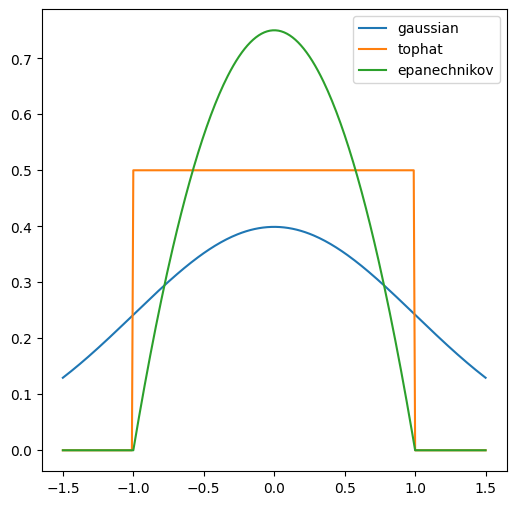

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.neighbors import KernelDensity
X = np.arange(-1.5, 1.501, 0.01)[:, np.newaxis]
plt.figure(figsize=(6, 6)); 
for K in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=K, bandwidth=1).fit([[.0]])
    log_dens = kde.score_samples(X)
    plt.plot(X, np.exp(log_dens), label=K)
plt.legend();


<p style="page-break-after:always;"></p>


**Ancho de banda o bandwidth:** $\;$ parámetro $h>0$ que controla el ancho de un kernel
$$\mathcal{K}_h(x)=\frac{1}{h}\mathcal{K}\left(\frac{x}{h}\right)$$

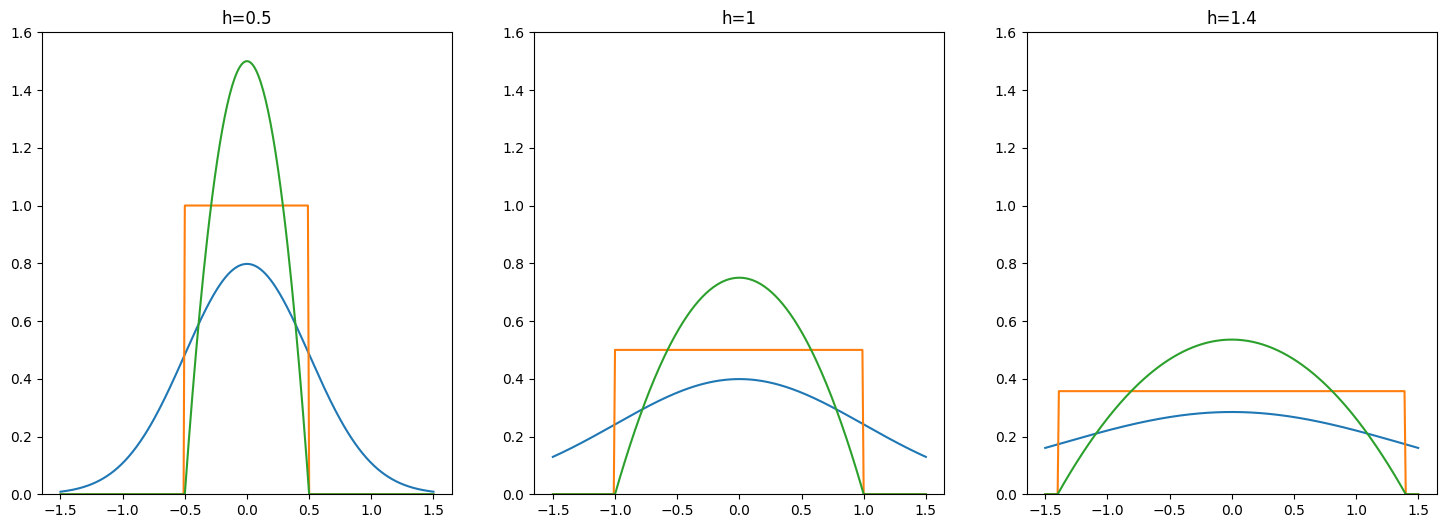

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.neighbors import KernelDensity
X = np.arange(-1.5, 1.501, 0.01)[:, np.newaxis]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, h in enumerate([.5, 1, 1.4]):
    axes[i].set_title(r'h={}'.format(h))
    axes[i].set_ylim(0, 1.6)
    for K in ['gaussian', 'tophat', 'epanechnikov']:
        log_dens = KernelDensity(kernel=K, bandwidth=h).fit([[.0]]).score_samples(X)
        axes[i].plot(X, np.exp(log_dens))

<p style="page-break-after:always;"></p>

**Radial basis function (RBF):** $\;$ kernel que generaliza los kernels 1d a vectores
$$\mathcal{K}_h(\boldsymbol{x})\propto\mathcal{K}_h(\lVert\boldsymbol{x}\rVert)$$

**RBF Gaussiano:** $\;h$ juega el papel de desviación típica (en cada dimensión)
$$\begin{align*}
\mathcal{K}_h(\boldsymbol{x})%
&=\prod_{d=1}^D\mathcal{K}_h(x_d)\\%
&=\prod_{d=1}^D\dfrac{1}{h}\dfrac{1}{(2\pi)^{1/2}}\exp\left(-\dfrac{1}{2}\left[\dfrac{x_d}{h}\right]^2\right)\\%
&=\dfrac{1}{h^D(2\pi)^{D/2}}\prod_{d=1}^D\exp\left(-\dfrac{1}{2h^2}x_d^2\right)\\%
&=\dfrac{1}{h^D(2\pi)^{D/2}}\exp\left(-\dfrac{1}{2}\left[\dfrac{\lVert\boldsymbol{x}\rVert}{h}\right]^2\right)
\end{align*}$$

<p style="page-break-after:always;"></p>

## 3.2 Estimador de densidad ventana de Parzen

**Estimación con una mixtura de Gaussianas:** $\;$ aun suponiendo coeficientes uniformes y Gaussianas hiperesféricas de tamaño idéntico y conocido, la estimación del número de componentes y medias resulta problemática
$$p(\boldsymbol{x}\mid\boldsymbol{\theta})%
=\frac{1}{K}\sum_{k=1}^K\mathcal{N}(\boldsymbol{x}\mid\boldsymbol{\mu},\sigma^2\mathbf{I})$$

**Mixtura con una Gaussiana por dato:** $\;$ solución trivial pues cada dato es la media de su componente
$$p(\boldsymbol{x}\mid\mathcal{D})%
=\frac{1}{N}\sum_{n=1}^N\mathcal{N}(\boldsymbol{x}\mid\boldsymbol{x}_n,\sigma^2\mathbf{I})$$

**Parzen window kernel density estimator (KDE):** $\;$ generaliza la mixtura con una Gaussiana por dato a un kernel densidad por dato
$$p(\boldsymbol{x}\mid\mathcal{D})%
=\frac{1}{N}\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)$$

**KDE vs mixturas:** $\;$ KDE no requiere escoger el número de componentes ni estimar parámetros, salvo el ancho de banda; ahora bien, dado que requiere mantener todos los datos, su coste espacial y temporal es muy elevado

<p style="page-break-after:always;"></p>

**Ejemplo:** KDE en 1d con $6$ datos y kernel Gaussiano

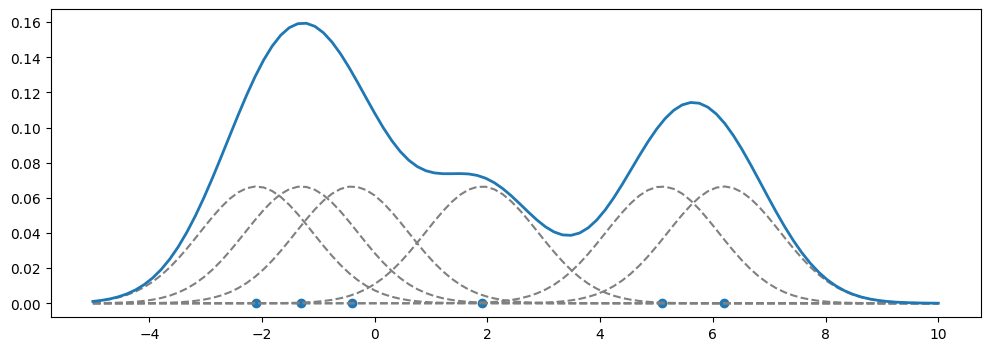

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.neighbors import KernelDensity
x_train = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])[:, np.newaxis]
N = x_train.shape[0]; h=1 # <<< bandwidth
x_test = np.linspace(-5, 10, 100)[:, np.newaxis]
plt.figure(figsize=(12, 4))
plt.scatter(x_train, np.zeros_like(x_train), marker="o")
for n in np.arange(N):
    x = x_train[n].reshape((1, 1))
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(x)
    log_dens = kde.score_samples(x_test)
    plt.plot(x_test, np.exp(log_dens) / N, c="gray", linestyle="--")
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(x_train)
log_dens = kde.score_samples(x_test)
plt.plot(x_test, np.exp(log_dens), linewidth=2);

<p style="page-break-after:always;"></p>

## 3.3 Elección del parámetro ancho de banda

**Ancho de banda "óptimo" para el kernel Gaussiano 1d:**
$$h=\sigma\left(\frac{4}{3N}\right)^{1/5}$$

**Aproximación robusta (frente a la presencia de outliers) para estimar $\sigma$**:
$$\hat{\sigma}=1.4826\operatorname{MAD}$$
donde $\operatorname{MAD}$ es la **median absolute deviation:**
$$\operatorname{MAD}=\operatorname{median}(\lvert\boldsymbol{x}-\operatorname{median}(\boldsymbol{x})\rvert)$$

**Caso multidimensional:** $\;$ si $D>1$, estimamos $h_d$ separadamente y tomamos
$$h=\left(\prod_{d=1}^Dh_d\right)^{1/D}$$

<p style="page-break-after:always;"></p>

## 3.4 De clasificación KDE a KNN

**Problema de clasificación:** $\;$ sea $\boldsymbol{x}$ una muestra a clasificar con base en conjunto de datos $\mathcal{D}$ y sea $K\geq 1$

**Densidad de una clase $c$ en $\boldsymbol{x}$ estimada con KDE balloon:** $\;$ hace crecer un volumen alrededor de $\boldsymbol{x}$, $V(\boldsymbol{x})$, hasta encontrar $K$ datos
$$p(\boldsymbol{x}\mid y=c,\mathcal{D})=\dfrac{\dfrac{N_c(\boldsymbol{x})}{N_c}}{V(\boldsymbol{x})}$$
donde $N_c(\boldsymbol{x})$ es el número de datos de la clase $c$ en $V(\boldsymbol{x})$ y $N_c$ es el total de datos de la clase $c$ (en $\mathcal{D}$)

**Posterior de una clase $c$ en $\boldsymbol{x}$:** $\;$ con priors de las clases estimadas como frecuencias relativas, coincide con la estimación KNN
$$p(y=c\mid\boldsymbol{x},\mathcal{D})%
=\dfrac{\dfrac{N_c(\boldsymbol{x})}{N_cV(\boldsymbol{x})}\dfrac{N_c}{N}}{\sum_{c'}\dfrac{N_{c'}(\boldsymbol{x})}{N_{c'}V(\boldsymbol{x})}\dfrac{N_{c'}}{N}}%
=\dfrac{N_c(\boldsymbol{x})}{\sum_{c'}N_{c'}(\boldsymbol{x})}%
=\dfrac{N_c(\boldsymbol{x})}{K}%
=\dfrac{1}{K}\sum_{n\in N_K(\boldsymbol{x},\mathcal{D})}\mathbb{I}(y_n=c)$$

**Clasificador KNN:** $\;$ puede verse como un clasificador generativo que estima las densidades condicionales KDE balloon

<p style="page-break-after:always;"></p>

## 3.5 Regresión kernel

**Regresión:** $\;$ como en clasificación, KDE se usa en regresión para construir modelos generativos que calculan la esperanza condicional
$$\mathbb{E}[y\mid\boldsymbol{x},\mathcal{D}]%
=\int y\,p(y\mid\boldsymbol{x},\mathcal{D})\,dy%
=\dfrac{\int y\,p(\boldsymbol{x},y\mid\mathcal{D})\,dy}{\int p(\boldsymbol{x},y\mid\mathcal{D})\,dy}$$

**Gaussiana multivariada para $p(\boldsymbol{x},y\mid\mathcal{D})$?:** $\;$ modelo equivalente a regresión lineal bastante limitado

### 3.5.1 Nadaraya-Watson

**Modelo Nadaraya-Watson:** $\;$ emplea KDE para aproximar la densidad conjunta
$$p(\boldsymbol{x},y\mid\mathcal{D})%
\approx\frac{1}{N}\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)\,\mathcal{K}_h(y-y_n)$$
Así, la esperanza condicional de la salida puede estimarse como una media ponderada de las salidas de los datos:
$$\begin{align*}\mathbb{E}[y\mid\boldsymbol{x},\mathcal{D}]%
&=\dfrac{\dfrac{1}{N}\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)\overbrace{\int y\,\mathcal{K}_h(y-y_n)\,dy}^{y_n}}{\dfrac{1}{N}\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)\underbrace{\int \mathcal{K}_h(y-y_n)\,dy}_{1}}\\%
&=\dfrac{\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)\,y_n}{\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)}\\%
&=\sum_{n=1}^N y_n\,w_n(\boldsymbol{x})%
\qquad\text{con}\qquad%
w_n(\boldsymbol{x})=\dfrac{\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)}{\sum_{n'=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_{n'})}
\end{align*}$$

<p style="page-break-after:always;"></p>

**Ejemplo:** regresión kernel en 1d con un kernel Gaussiano

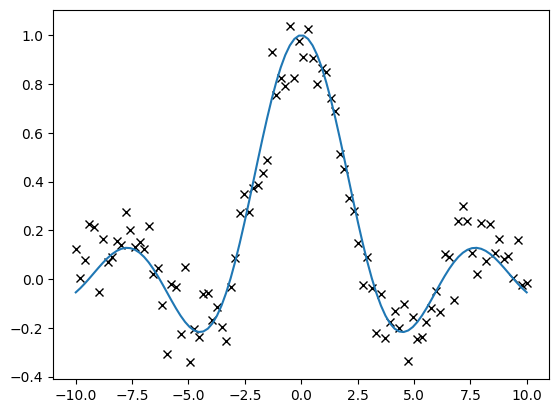

In [4]:
import numpy as np; import matplotlib.pyplot as plt
N_train = 100; noise = 0.1; N_test = 100; np.random.seed(0)
x_train = 10 * (np.linspace(-1, 1, N_train).reshape(-1, 1))
y_train = np.divide(np.sin(np.abs(x_train)), np.abs(x_train))
y_train += noise * np.random.randn(N_train, 1)
x_test = 10 * (np.linspace(-1, 1, N_test).reshape(-1, 1))
y_test = np.divide(np.sin(np.abs(x_test)), np.abs(x_test))
plt.plot(x_train, y_train, 'kx'); plt.plot(x_test, y_test);


<p style="page-break-after:always;"></p>


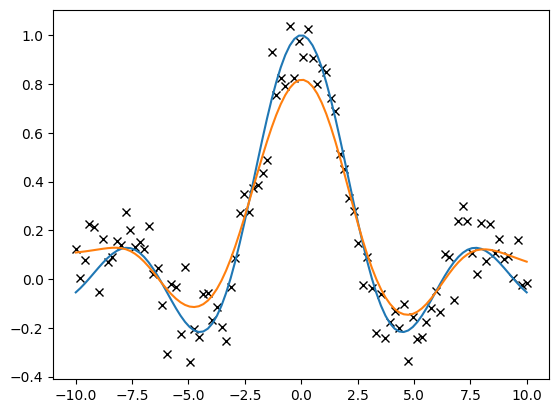

In [5]:
from sklearn.neighbors import KernelDensity
y_pred = np.zeros_like(y_test); w = np.zeros_like(x_train);
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit([[.0]])
for i in np.arange(N_test):
    x = x_test[i].reshape(1, 1)
    w = np.exp(kde.score_samples(x - x_train))
    w = w / w.sum()
    y_pred[i] = np.dot(y_train.T, w)
plt.plot(x_train, y_train, 'kx'); plt.plot(x_test, y_test);
plt.plot(x_test, y_pred);

<p style="page-break-after:always;"></p>

### 3.5.2 Nadaraya-Watson Gaussiano con softmax

**Nadaraya-Watson:** $\;$ dada una entrada $\boldsymbol{x}$, Nadaraya-Watson regresa una media ponderada de las salidas de los datos

**Nadaraya-Watson Gaussiano:** $\;$ con kernel Gaussiano, los pesos son probabilidades obtenidas mediante normalización softmax de logits que miden la similitud (neg-distancia) entre $\boldsymbol{x}$ y cada dato
$$\begin{align*}
w_n(\boldsymbol{x})%
&=\dfrac{\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)}{\sum_{n'=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_{n'})}\\%
&=\dfrac{\dfrac{1}{h^D(2\pi)^{D/2}}\exp\left[-\dfrac{1}{2h^2}\lVert\boldsymbol{x}-\boldsymbol{x}_n\rVert^2\right]}{\sum\limits_{n'=1}^N\dfrac{1}{h^D(2\pi)^{D/2}}\exp\left[-\dfrac{1}{2h^2}\lVert\boldsymbol{x}-\boldsymbol{x}_{n'}\rVert^2\right]}\\%
&=S\left(\left\{-\dfrac{1}{2h^2}\lVert\boldsymbol{x}-\boldsymbol{x}_{n'}\rVert^2\right\}_{n'=1}^N\right)_n%
\end{align*}$$

<p style="page-break-after:always;"></p>

**Nadaraya-Watson Gaussiano como mecanismo de atención (no paramétrico):**
* **Diccionario de claves:** $\;$ son las entradas de los datos
* **Valores asociados a las claves:** $\;$ son las salidas de los datos
* **Consulta (query):** $\;$ entrada $\boldsymbol{x}$ dada en inferencia
* **Pesos de atención:** $\;$ pesos de los datos tras la consulta
* **Scores de atención:** $\;$ logits asociados a los pesos de atención
* **Atención:** $\;$ modelo de regresión condicional que presta mayor atención a las claves parecidas a la consulta

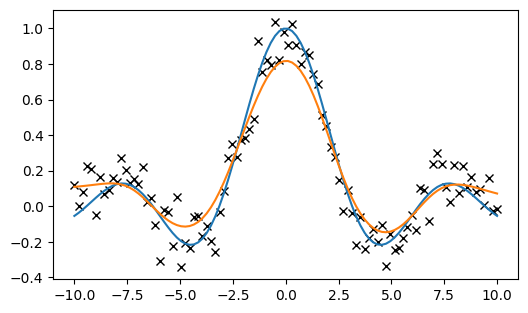

In [14]:
h = 1; negsqL2 = lambda x: -0.5 * np.inner(x, x) / h
y_pred = np.zeros_like(y_test); w = np.zeros_like(x_train);
for i in np.arange(N_test):
    z = x_test[i] - x_train
    logits = np.apply_along_axis(negsqL2, 1, z)
    logits -= np.max(logits); w = np.exp(logits); w /= w.sum()
    y_pred[i] = np.dot(y_train.T, w)
plt.figure(figsize=(6, 3.5)); plt.plot(x_train, y_train, 'kx'); plt.plot(x_test, y_test)
plt.plot(x_test, y_pred);